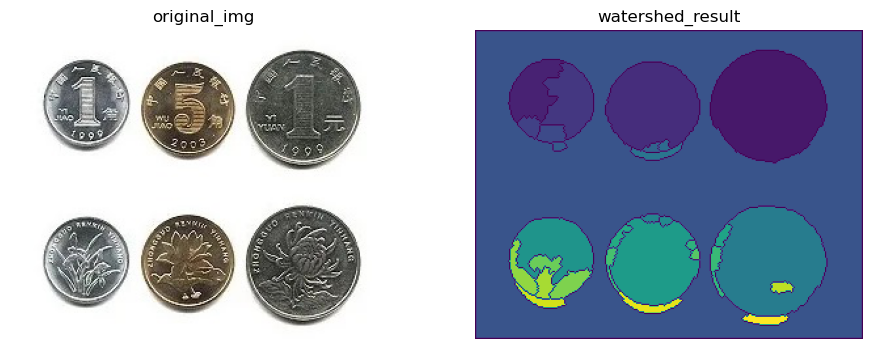

In [9]:
#  姓名：王安文
#  学号：122106010768
#  作业名：分水岭实验
#  课程：图像分析基础
#  作业实现内容：基于opencv实现分水岭算法
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# 读入原图并转换为灰度图和RGB通道
image = cv.imread("coin.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
imagergb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# 对灰度图做阈值分割
ret1, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
# 形态学滤波函数和膨胀处理
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv.dilate(opening, kernel, iterations=3)

dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret2, sure_fg = cv.threshold(dist_transform, 0.005*dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv.subtract(sure_bg, sure_fg)

ret3, markers = cv.connectedComponents(sure_fg)
img = cv.watershed(image, markers)

# 展示图片效果
plt.figure(figsize=(11, 11))
plt.subplot(121), plt.imshow(imagergb)
plt.title('original_img'), plt.axis('off')
plt.subplot(122), plt.imshow(img)
plt.title('watershed_result'), plt.axis('off')
plt.show()